In [19]:
import pandas as pd

In [20]:
df = pd.read_csv("data/my.csv", index_col=None)

In [21]:
df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,25,0.17.1,0.03,0.17.2,0.24,0.25,0.26,0.05,0.27,normal
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


In [22]:
df.shape

(125972, 42)

In [23]:
y = df[df.columns[-1]].values
from collections import Counter
#num = Counter(y)
#n=num.get('normal')
Counter(y)

Counter({'normal': 67342,
         'neptune': 41214,
         'warezclient': 890,
         'ipsweep': 3599,
         'portsweep': 2931,
         'teardrop': 892,
         'nmap': 1493,
         'satan': 3633,
         'smurf': 2646,
         'pod': 201,
         'back': 956,
         'guess_passwd': 53,
         'ftp_write': 8,
         'multihop': 7,
         'rootkit': 10,
         'buffer_overflow': 30,
         'imap': 11,
         'warezmaster': 20,
         'phf': 4,
         'land': 18,
         'loadmodule': 9,
         'spy': 2,
         'perl': 3})

In [24]:
from sklearn.preprocessing import LabelEncoder
encodings = dict()
for c in df.columns:
    #print df[c].dtype
    if df[c].dtype == "object":
        encodings[c] = LabelEncoder() #to give numerical label to char type labels.
        encodings[c]
        df[c] = encodings[c].fit_transform(df[c])

In [25]:
y = df.pop(df.columns[-1]).values
X = df.values

In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
onehotencoder = ColumnTransformer([('t', OneHotEncoder(), [1])], remainder='passthrough')
X = onehotencoder.fit_transform(X)


In [27]:
from sklearn.preprocessing import StandardScaler #normalization
X = StandardScaler().fit_transform(X)

In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
%matplotlib inline 
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDfX = pd.DataFrame(data = principalComponents)

In [29]:
principalDfX[:][0]

0         0.049615
1         3.696940
2        -2.425037
3        -2.237898
4         2.833618
            ...   
125967    3.728968
125968   -2.021768
125969   -0.250704
125970    3.621226
125971   -1.413678
Name: 0, Length: 125972, dtype: float64

Text(0, 0.5, 'Second Principal Component')

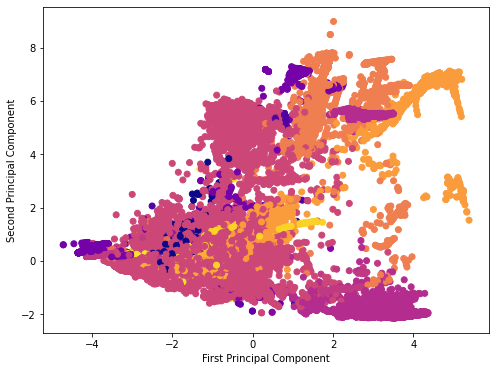

In [30]:
# giving a larger plot 
plt.figure(figsize =(8, 6)) 
  
plt.scatter(principalDfX[:][0], principalDfX[:][1],c = y, cmap ='plasma') 
  
# labeling x and y axes 
plt.xlabel('First Principal Component') 
plt.ylabel('Second Principal Component') 


In [31]:
principalDfX.head()
print(Counter(y))

Counter({11: 67342, 9: 41214, 17: 3633, 5: 3599, 15: 2931, 18: 2646, 10: 1493, 0: 956, 20: 892, 21: 890, 14: 201, 3: 53, 1: 30, 22: 20, 6: 18, 4: 11, 16: 10, 7: 9, 2: 8, 8: 7, 13: 4, 12: 3, 19: 2})


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(principalDfX, y, test_size=0.2, random_state=42)#random for splitting same data when run again.
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [33]:
print(Counter(y_train))
num = Counter(y_train)
n=num.get(11)

Counter({11: 53956, 9: 32976, 17: 2884, 5: 2856, 15: 2348, 18: 2095, 10: 1195, 0: 755, 21: 714, 20: 696, 14: 165, 3: 39, 1: 23, 6: 16, 22: 16, 4: 9, 2: 8, 16: 8, 7: 6, 8: 6, 13: 3, 12: 2, 19: 1})


In [34]:
from sklearn.tree import DecisionTreeClassifier 

Dtree1 = DecisionTreeClassifier(criterion = "gini") 
Dtree1.fit(X_train,y_train)

DecisionTreeClassifier()

In [35]:
y_pred = Dtree1.predict(X_test) #op of step1
print(Counter(y_pred))
print(Counter(y_test))


Counter({11: 13373, 9: 8239, 17: 746, 5: 733, 15: 601, 18: 558, 10: 319, 0: 200, 20: 190, 21: 158, 14: 41, 3: 11, 6: 6, 1: 6, 22: 3, 4: 3, 2: 2, 7: 2, 13: 1, 12: 1, 16: 1, 8: 1})
Counter({11: 13386, 9: 8238, 17: 749, 5: 743, 15: 583, 18: 551, 10: 298, 0: 201, 20: 196, 21: 176, 14: 36, 3: 14, 1: 7, 22: 4, 7: 3, 6: 2, 4: 2, 16: 2, 12: 1, 19: 1, 8: 1, 13: 1})


In [36]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
 
results = confusion_matrix(y_test, y_pred) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_test, y_pred))
print('Report : ')
print(classification_report(y_test, y_pred))


Confusion Matrix :
[[  118     0     0     0     0     0     0     0     0     0     1    72
      0     0     0     0     0     0     6     0     3     1     0]
 [    0     2     0     0     0     0     0     0     0     0     0     4
      0     0     0     0     0     0     0     0     1     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0    10     0     0     0     0     0     1     0     3
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     2     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    1     0     0     0     0   705     0     0     0     0    18    10
      0     0     2     6     0     1     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     2
      0     0     0     0     0     0     0     0

D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
predicted = cross_val_predict(Dtree1, X_train, y_train, cv=skf)
print('Accuracy Score :',accuracy_score(y_train, predicted))
print('Report : ')
print(classification_report(y_train, predicted))


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score : 0.9529158438929518
Report : 
              precision    recall  f1-score   support

           0       0.54      0.55      0.55       755
           1       0.20      0.17      0.19        23
           2       0.20      0.25      0.22         8
           3       0.84      0.79      0.82        39
           4       0.20      0.22      0.21         9
           5       0.95      0.96      0.95      2856
           6       0.12      0.12      0.12        16
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         6
           9       1.00      1.00      1.00     32976
          10       0.90      0.89      0.90      1195
          11       0.96      0.96      0.96     53956
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         3
          14       0.66      0.64      0.65       165
          15       0.93      0.93      0.93      2348
          16       0.00      0.00  